<a href="https://colab.research.google.com/github/NguyenTanPhats/Exercies_AI/blob/main/baitap_w9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [2]:
x=x_test
y=y_test

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

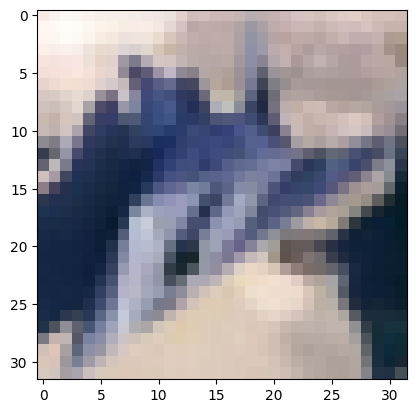

So nay la:  [0]


In [5]:
digit = x_train[555]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print('So nay la: ', y_train[555])

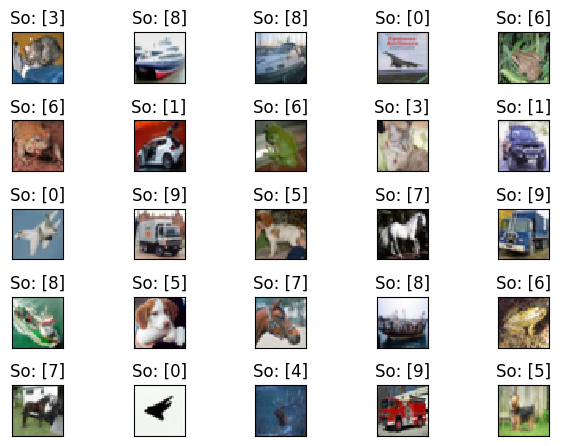

In [6]:
for i in range(25):
  plt.subplot(5,5,i+1) 
  plt.tight_layout()
  plt.imshow(x_test[i],cmap='gray',interpolation='none')
  plt.title('So: {}'.format(y_test[i])) 
  plt.xticks([])
  plt.yticks([])

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(1000,activation = 'relu', input_shape = (3072,))) 
model.add(Dropout(0.5))
model.add(Dense(1400,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(800,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))

In [8]:
model.add(Dense(10, activation = 'Softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 1400)              1401400   
                                                                 
 dropout_1 (Dropout)         (None, 1400)              0         
                                                                 
 dense_2 (Dense)             (None, 800)               1120800   
                                                                 
 dropout_2 (Dropout)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               8

In [9]:
x_train = x_train.reshape(50000, 32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000, 32*32*3)
x_test = x_test.astype('float32')/255

In [10]:
x_train.shape

(50000, 3072)

In [11]:
x_test.shape

(10000, 3072)

In [12]:
from keras.utils import to_categorical        
y_train = to_categorical(y_train, 10)  
y_test = to_categorical(y_test, 10)

In [13]:
y_train.shape

(50000, 10)

In [14]:
y_test.shape

(10000, 10)

In [15]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size=100) 

Epoch 1/10
500/500 [==============================] - 59s 111ms/step - loss: 2.1927 - accuracy: 0.1697
Epoch 2/10
500/500 [==============================] - 60s 120ms/step - loss: 2.0398 - accuracy: 0.2301
Epoch 3/10
500/500 [==============================] - 57s 114ms/step - loss: 1.9976 - accuracy: 0.2451
Epoch 4/10
500/500 [==============================] - 56s 111ms/step - loss: 1.9623 - accuracy: 0.2665
Epoch 5/10
500/500 [==============================] - 57s 114ms/step - loss: 1.9399 - accuracy: 0.2804
Epoch 6/10
500/500 [==============================] - 56s 111ms/step - loss: 1.9163 - accuracy: 0.2911
Epoch 7/10
500/500 [==============================] - 56s 111ms/step - loss: 1.9047 - accuracy: 0.2980
Epoch 8/10
500/500 [==============================] - 56s 112ms/step - loss: 1.8945 - accuracy: 0.3031
Epoch 9/10
500/500 [==============================] - 56s 111ms/step - loss: 1.8776 - accuracy: 0.3119
Epoch 10/10
500/500 [==============================] - 55s 111ms/step - l

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Mat mat: ', test_loss)
print('Do chinh xac:', test_acc)

313/313 [==============================] - 7s 21ms/step - loss: 1.8624 - accuracy: 0.3572
Mat mat:  1.862434983253479
Do chinh xac: 0.3571999967098236


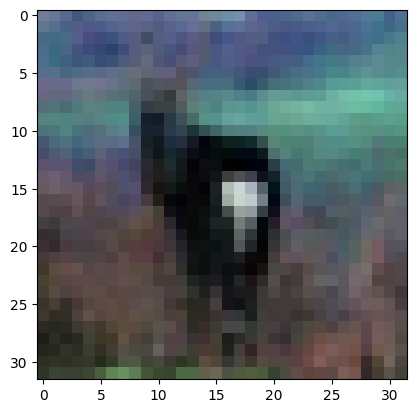

[4]


In [17]:
img = x[2002]
plt.imshow(img)
plt.show()
print(y[2002])

In [18]:
X_pred = x[10].reshape(1,32*32*3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 112ms/step


array([8])

In [19]:
model.save('cifar10_model.h5')

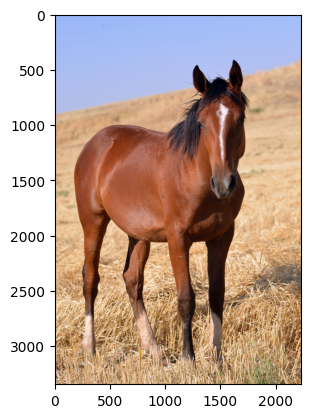

In [26]:
url = '/content/Hesp.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

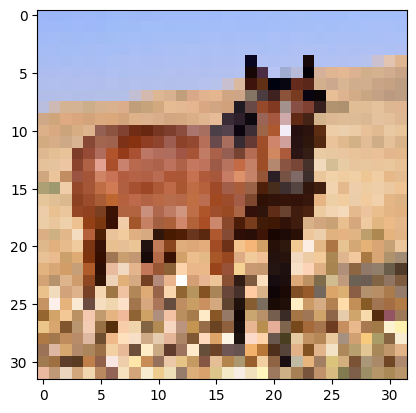

In [27]:
from keras.utils import load_img, img_to_array
img = load_img(url, target_size = (32,32))
plt.imshow(img)

In [28]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 25ms/step


array([7])

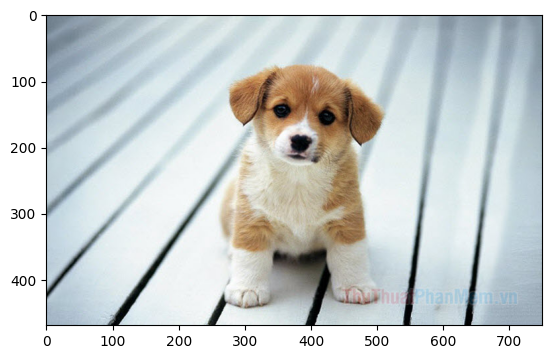

In [23]:
url = '/content/hinh-anh-nhung-con-cho-de-thuong_092948873.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

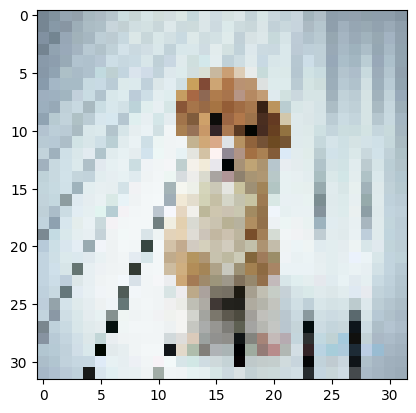

In [24]:
from keras.utils import load_img, img_to_array
img = load_img(url, target_size = (32,32))
plt.imshow(img)

In [25]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 76ms/step


array([3])

In [57]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from keras.datasets import cifar100


(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [58]:
x=x_test
y=y_test

In [59]:
x_train.shape

(50000, 32, 32, 3)

In [60]:
y_train.shape

(50000, 1)

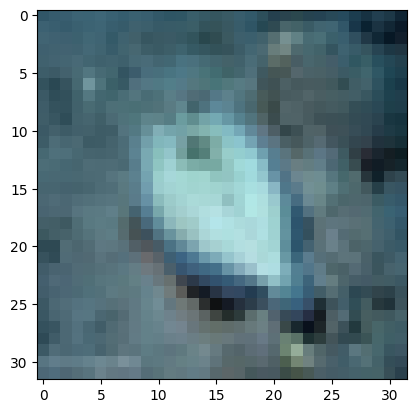

So nay la:  [32]


In [61]:
digit = x_train[2222]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print('So nay la: ', y_train[2222])

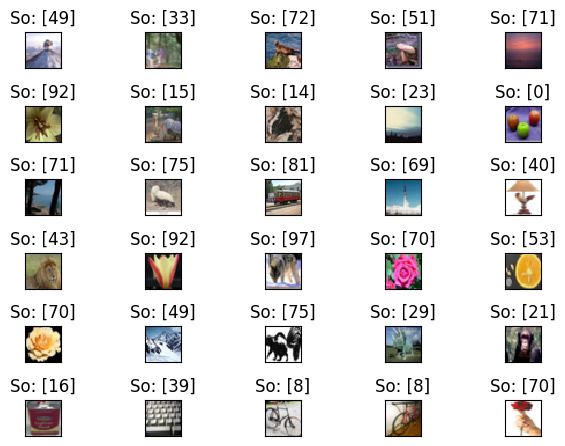

In [62]:
for i in range(30):
  plt.subplot(6,5,i+1) 
  plt.tight_layout()
  plt.imshow(x_test[i],cmap='gray',interpolation='none')
  plt.title('So: {}'.format(y_test[i])) 
  plt.xticks([])
  plt.yticks([])

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(1000,activation = 'relu', input_shape = (3072,))) 
model.add(Dropout(0.5))
model.add(Dense(1400,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(800,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1500,activation = 'relu'))

In [64]:
model.add(Dense(100, activation = 'Softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1000)              3073000   
                                                                 
 dropout_9 (Dropout)         (None, 1000)              0         
                                                                 
 dense_16 (Dense)            (None, 1400)              1401400   
                                                                 
 dropout_10 (Dropout)        (None, 1400)              0         
                                                                 
 dense_17 (Dense)            (None, 800)               1120800   
                                                                 
 dropout_11 (Dropout)        (None, 800)               0         
                                                                 
 dense_18 (Dense)            (None, 1500)             

In [65]:
x_train = x_train.reshape(50000, 32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000, 32*32*3)
x_test = x_test.astype('float32')/255

In [66]:
x_train.shape

(50000, 3072)

In [67]:
x_test.shape

(10000, 3072)

In [68]:
from keras.utils import to_categorical        
y_train = to_categorical(y_train, 100)  
y_test = to_categorical(y_test, 100)

In [69]:
y_train.shape

(50000, 100)

In [70]:
y_test.shape

(10000, 100)

In [71]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size=100) 

Epoch 1/10
500/500 [==============================] - 69s 137ms/step - loss: 4.5347 - accuracy: 0.0190
Epoch 2/10
500/500 [==============================] - 68s 135ms/step - loss: 4.3384 - accuracy: 0.0336
Epoch 3/10
500/500 [==============================] - 68s 136ms/step - loss: 4.2362 - accuracy: 0.0446
Epoch 4/10
500/500 [==============================] - 69s 138ms/step - loss: 4.1722 - accuracy: 0.0529
Epoch 5/10
500/500 [==============================] - 68s 137ms/step - loss: 4.1267 - accuracy: 0.0595
Epoch 6/10
500/500 [==============================] - 70s 141ms/step - loss: 4.1009 - accuracy: 0.0620
Epoch 7/10
500/500 [==============================] - 69s 138ms/step - loss: 4.0778 - accuracy: 0.0666
Epoch 8/10
500/500 [==============================] - 68s 137ms/step - loss: 4.0524 - accuracy: 0.0715
Epoch 9/10
500/500 [==============================] - 69s 139ms/step - loss: 4.0399 - accuracy: 0.0725
Epoch 10/10
500/500 [==============================] - 70s 139ms/step - l

In [72]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Mat mat: ', test_loss)
print('Do chinh xac:', test_acc)

313/313 [==============================] - 6s 17ms/step - loss: 4.1305 - accuracy: 0.0760
Mat mat:  4.130497455596924
Do chinh xac: 0.07599999755620956


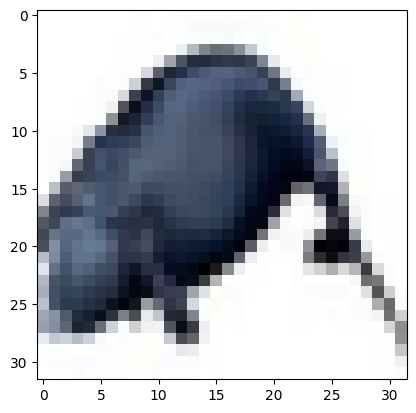

[95]


In [73]:
img = x[6868]
plt.imshow(img)
plt.show()
print(y[6868])

In [74]:
X_pred = x[10].reshape(1,32*32*3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 81ms/step


array([69])

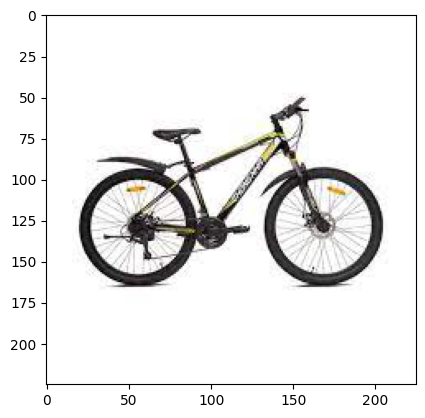

In [75]:
url = '/content/xedap.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

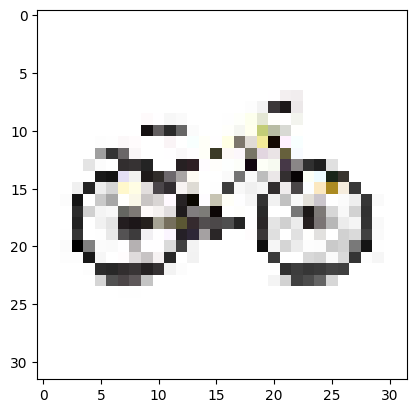

In [76]:
from keras.utils import load_img, img_to_array
img = load_img(url, target_size = (32,32))
plt.imshow(img)

In [77]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 26ms/step


array([84])

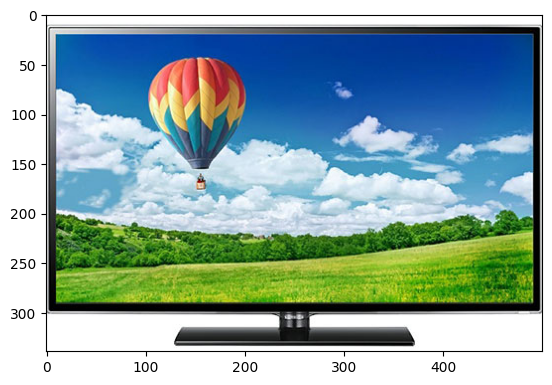

In [78]:
url = '/content/thay-man-hinh-tivi-tai-hai-phong(1).jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

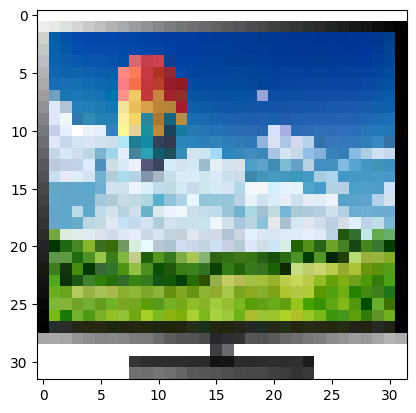

In [79]:
from keras.utils import load_img, img_to_array
img = load_img(url, target_size = (32,32))
plt.imshow(img)

In [80]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 28ms/step


array([68])

In [82]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from keras.datasets import fashion_mnist


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [83]:
x=x_test
y=y_test

In [84]:
x_train.shape

(60000, 28, 28)

In [85]:
y_train.shape

(60000,)

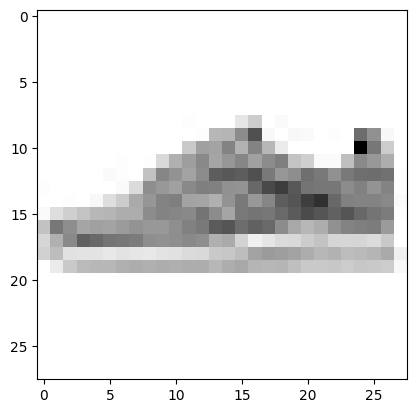

So nay la:  7


In [86]:
digit = x_train[666]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print('So nay la: ', y_train[666])

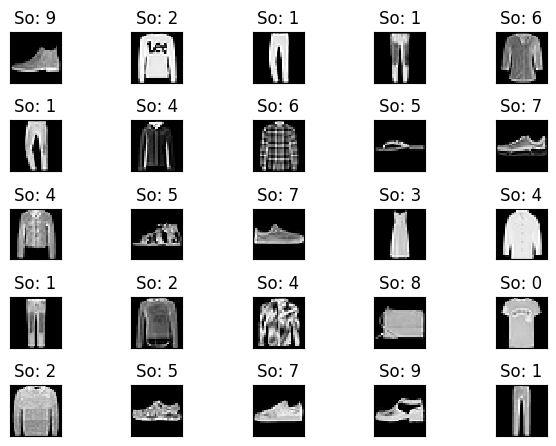

In [87]:
for i in range(25):
  plt.subplot(5,5,i+1) 
  plt.tight_layout()
  plt.imshow(x_test[i],cmap='gray',interpolation='none')
  plt.title('So: {}'.format(y_test[i])) 
  plt.xticks([])
  plt.yticks([])

In [88]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential() #ANN
model.add(Dense(100,activation='relu',input_shape=(784,))) # dữ liệu vào 784

model.add(Dense(10, activation='softmax'))



In [89]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [91]:
x_train.shape

(60000, 784)

In [92]:
x_test.shape

(10000, 784)

In [90]:
x_train = x_train.reshape(60000, 28*28)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000, 28*28)
x_test = x_test.astype('float32')/255

In [93]:
from keras.utils import to_categorical        
y_train = to_categorical(y_train, 10)  
y_test = to_categorical(y_test, 10)

In [95]:
y_train.shape

(60000, 10)

In [96]:
y_test.shape

(10000, 10)

In [97]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size=100) 

Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 0.5663 - accuracy: 0.8026
Epoch 2/10
600/600 [==============================] - 3s 6ms/step - loss: 0.4087 - accuracy: 0.8531
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3636 - accuracy: 0.8681
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3349 - accuracy: 0.8776
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3174 - accuracy: 0.8851
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.3035 - accuracy: 0.8898
Epoch 7/10
600/600 [==============================] - 3s 4ms/step - loss: 0.2907 - accuracy: 0.8939
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2799 - accuracy: 0.8976
Epoch 9/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2712 - accuracy: 0.9006
Epoch 10/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2616 - accuracy: 0.9040

In [98]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Mat mat: ', test_loss)
print('Do chinh xac:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3902 - accuracy: 0.8670
Mat mat:  0.3902464210987091
Do chinh xac: 0.8669999837875366


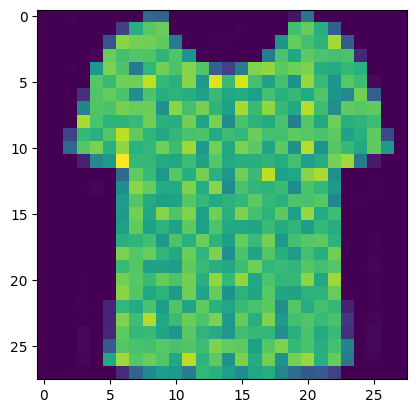

0


In [100]:
img = x[1000]
plt.imshow(img)
plt.show()
print(y[1000])

In [101]:
X_pred = x[10].reshape(1,28*28)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 52ms/step


array([4])

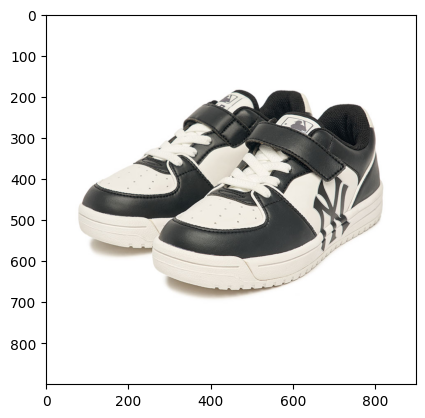

In [102]:
url = '/giay-the-thao.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

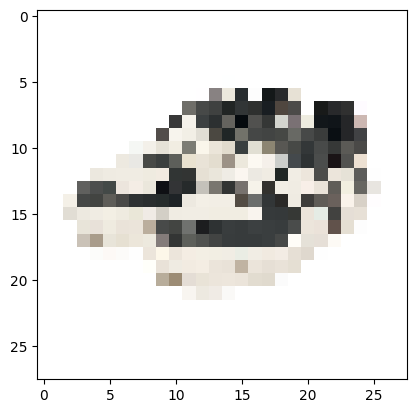

In [103]:
from keras.utils import load_img, img_to_array
img = load_img(url, target_size = (28,28))
plt.imshow(img)